In [1]:
from src.FunctionsSurface import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm
from matplotlib.ticker import LogLocator, ScalarFormatter
import plotly.graph_objs as go

In [ ]:
N = 5000
dim = [1,2,3,4]
for i in dim:
    parms =  [k for k in list_all_folders(N,i)]
    for l in range(len(parms)):
        all_properties_dataframe(N, i, parms[l][0], parms[l][1])

In [3]:
N = 5000
dim = [4]
for i in dim:
    parms = [k for k in list_all_folders_2d(N,i)]
    for l in range(len(parms)):
        all_properties_dataframe_2(N, i, parms[l][0], parms[l][1])

KeyboardInterrupt: 

In [ ]:
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000]
dim = [1,2,3,4]
for n in N:
    for i in dim:
        parms =  [k for k in list_all_folders(n,i)]
        for l in range(len(parms)):
            all_properties_dataframe(n, i, parms[l][0], parms[l][1])

In [ ]:
N = 5000
dim = [1,2,3,4]
for i in dim:
    parms =  [k for k in list_all_folders(N,i)]
    for l in range(len(parms)):
        copy_files_cleber(N, i, parms[l][0], parms[l][1])

In [ ]:
alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

for n in N__:
    for d in dim:
        for g in alpha_g:
            for a in alpha_a:
                alpha_G = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=True)
                create_all_properties_file(n, d, a, alpha_G, alpha_g_variable=True)

    for d in dim:
        for a in alpha_a:
            for g in alpha_g:
                alpha_A = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=False)
                create_all_properties_file(n, d, alpha_A, g, alpha_g_variable=False)

In [ ]:
data = pd.read_csv("../../data/all_data.csv",sep=',')
all_data =  filter_dataframe(data)
all_data.head()

In [ ]:
all_data["n_size"].unique()

In [ ]:
df__ = assortativity_N(all_data, [5000, 10000, 20000, 40000])

In [ ]:
median = []
avarage = []
for i in [1,2,3,4]:
    order = [find_order_of_magnitude(i) for i in df__[df__['dim']  == i ]["N*"].values]
    median.append(np.median(sorted(order)))
    avarage.append(np.mean(order))
    plt.hist(order,label=f'dim = {i}', alpha = 0.3, edgecolor='black')
print("median =",median)
print("mean = ",avarage)
plt.xlabel("Order of magnitude N*")
plt.legend()
plt.show()

In [ ]:
for dim in [1,2,3,4]:
        data = {'x': df__[df__["dim"] == dim]["alpha_a"].values,
                'y': df__[df__["dim"] == dim]["alpha_g"].values,
                'z': np.log10(df__[df__["dim"] == dim]["N*"].values)}

        df_ = pd.DataFrame(data)

        df_ = df_.sort_values(by='y')

        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')

        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(r"$\log_{10} N^*$", fontsize=18)

        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

In [ ]:
all_data_filter = filter_dataframe(all_data)
all_data_filter.head()

In [ ]:
List_N = [5000, 10000, 20000, 40000]
df = beta_all(all_data_filter, List_N)
df.head()

In [ ]:
df_1d = df[df["dim"]==1]
df_2d = df[df["dim"]==2]
df_3d = df[df["dim"]==3]
df_4d = df[df["dim"]==4]

In [4]:
def heatmap(dataframe, propertie = "short_mean", label_prop = r'$\langle \ell \rangle$' ,dim = 1):
        # Example DataFrame with x, y, z values
        
        data = {'alpha_a': dataframe[dataframe["dim"] == dim]["alpha_a"].values,
                'alpha_g': dataframe[dataframe["dim"] == dim]["alpha_g"].values,
                'propertie': dataframe[dataframe["dim"] == dim][propertie].values}

        df_ = pd.DataFrame(data)
        
        # Sort unique values of alpha_a and alpha_g
        #alpha_a_sorted = sorted(df['alpha_a'].unique())
        #alpha_g_sorted = sorted(df['alpha_g'].unique())
        
        # Pivot the DataFrame to prepare for heatmap
#        pivot_df = df_.pivot(index='alpha_a', columns='alpha_g', values='propertie')
        pivot_df = df_.pivot(index='alpha_a', columns='alpha_g', values='propertie')
        
        # Reorder rows and columns based on the sorted alpha_a and alpha_g values
        #pivot_df = pivot_df.reindex(index=alpha_a_sorted, columns=alpha_g_sorted)
        # Reorder columns based on the sorted alpha_g values
        #pivot_df = pivot_df[alpha_g_sorted]
        
        
        # Plot heatmap
        ax = sns.heatmap(pivot_df, annot=False, cmap='YlOrBr')

        plt.title(f'Dim = {dim}')
        plt.xlabel(r'$\alpha_g$')
        plt.ylabel(r'$\alpha_a$')

        # Add color bar legend
        cbar = ax.collections[0].colorbar
        cbar.set_label(label_prop)
        # Adjust step between ticks for alpha_a and alpha_g
        #plt.xticks(range(11))
        #plt.yticks(range(11))
        #plt.yticks(range(len(alpha_a_sorted)), alpha_a_sorted)
        plt.tight_layout()
        plt.show()


In [ ]:
for d in [1,2,3,4]:
    heatmap(df,  dim = d)

In [2]:
df_ = pd.read_csv("../../data/data_5000.csv", delimiter=',')
df_ = df_.sort_values(by=['alpha_a','alpha_g'])
df_

FileNotFoundError: [Errno 2] No such file or directory: '../../data/data_5000.csv'

In [4]:
def min_values_df(df):
    # Filter data to alpha_g >= 1
    df_filter_g = df[df["alpha_g"] >= 1]

    # Select unique values of alpha_g
    alpha_g_min = df_filter_g['alpha_g'].unique()

    # load alpha_a_min index to propertie
    alpha_a_min = []

    # propertie_min
    propertie_min = []
    

    headers = ['alpha_a_short','alpha_a_ass','alpha_a_diameter',
                'n_size','dim','short_min','diameter_min','ass_coeff_min','short_err','diameter_err',
                'ass_coeff_err','n_samples']
    
    # Create other dataframe with same headers
    data = pd.DataFrame(columns=headers)

    dim = [1,2,3,4]
    for d in dim:
        df__ = df_filter_g[df_filter_g['dim']==d]
        # assist to append elements in dataframe
        pos = 0
        for i in alpha_g_unique:
        
            # Select index to min_value (assortativity, short and diameter)
            index_min_ass = df__[df__['alpha_g'] == i]['ass_coeff_mean'].idxmin()
            index_min_short = df__[df__['alpha_g'] == i]['short_mean'].idxmin()
            index_min_diameter = df__[df__['alpha_g'] == i]['diameter_mean'].idxmin()
            
            data.loc[pos, 'alpha_g'] = i
            data.loc[pos, 'alpha_a_short'] = df__['alpha_a'].loc[index_min_short]
            data.loc[pos, 'alpha_a_diameter'] = df__['alpha_a'].loc[index_min_diameter]
            data.loc[pos, 'alpha_a_ass'] = df__['alpha_a'].loc[index_min_ass]
            data.loc[pos, 'n_size'] = df__['n_size'].loc[index_min]
            data.loc[pos, 'dim'] = d
            data.loc[pos, 'short_min'] = df__['short_mean'].loc[index_min]
            data.loc[pos, 'ass_coeff_min'] = df__['ass_coeff_mean'].loc[index_min]
            data.loc[pos, 'diameter_min'] = df__['diameter_mean'].loc[index_min]
            data.loc[pos, 'short_err'] = df__['short_err'].loc[index_min]
            data.loc[pos, 'diameter_err'] = df__['diameter_err'].loc[index_min]
            data.loc[pos, 'ass_coeff_err'] = df__['ass_coeff_err'].loc[index_min]
            data.loc[pos, 'n_samples'] = df__['n_samples'].loc[index_min]
            pos += 1
    
    # for d in dim:
    #     df_filter_g = df_filter_g[df_filter_g['dim']==d]
    #     # assist to append elements in dataframe
    #     pos = 0
    #     for i in alpha_g_unique:
    
    #         # Select index to min_value (assortativity, short and diameter)
    #         index_min_ass = df_filter_g[df_filter_g['alpha_g'] == i]['ass_coeff_mean'].idxmin()
    #         index_min_short = df_filter_g[df_filter_g['alpha_g'] == i]['short_mean'].idxmin()
    #         index_min_diameter = df_filter_g[df_filter_g['alpha_g'] == i]['diameter_mean'].idxmin()
            
    #         data.loc[pos, 'alpha_g'] = i
    #         data.loc[pos, 'alpha_a_short'] = df_filter_g['alpha_a'].loc[index_min_short]
    #         data.loc[pos, 'alpha_a_diameter'] = df_filter_g['alpha_a'].loc[index_min_diameter]
    #         data.loc[pos, 'alpha_a_ass'] = df_filter_g['alpha_a'].loc[index_min_ass]
    #         data.loc[pos, 'n_size'] = df_filter_g['n_size'].loc[index_min]
    #         data.loc[pos, 'dim'] = d
    #         data.loc[pos, 'short_min'] = df_filter_g['short_mean'].loc[index_min]
    #         data.loc[pos, 'ass_coeff_min'] = df_filter_g['ass_coeff_mean'].loc[index_min]
    #         data.loc[pos, 'diameter_min'] = df_filter_g['diameter_mean'].loc[index_min]
    #         data.loc[pos, 'short_err'] = df_filter_g['short_err'].loc[index_min]
    #         data.loc[pos, 'diameter_err'] = df_filter_g['diameter_err'].loc[index_min]
    #         data.loc[pos, 'ass_coeff_err'] = df_filter_g['ass_coeff_err'].loc[index_min]
    #         data.loc[pos, 'n_samples'] = df_filter_g['n_samples'].loc[index_min]
    #         pos += 1

    return data
    

In [4]:
df = df_
# Filter data to alpha_g >= 1
df_filter_g = df[df["alpha_g"] >= 1]

# Select unique values of alpha_g
alpha_g_min = df_filter_g['alpha_g'].unique()

# load alpha_a_min index to propertie
alpha_a_min = []

# propertie_min
propertie_min = []


headers = ['alpha_a_short','alpha_a_ass','alpha_a_diameter',
            'n_size','dim','short_min','diameter_min','ass_coeff_min','short_err','diameter_err',
            'ass_coeff_err','n_samples']

# Create other dataframe with same headers
data = pd.DataFrame(columns=headers)

#dim = [1,2,3,4]
for d in [1,2,3,4]:
    df__ = df_filter_g[df_filter_g['dim']==d]
    # assist to append elements in dataframe
    #pos = 0
    print(df__)

       alpha_a  alpha_g  n_size  dim  short_mean  diameter_mean  \
22398      0.0      1.0    5000    1    8.607769      22.702970   
21954      0.0      1.1    5000    1    8.643371      22.732673   
21681      0.0      1.2    5000    1    8.632334      22.831683   
23315      0.0      1.3    5000    1    8.583717      22.841584   
23094      0.0      1.4    5000    1    8.654481      22.623762   
...        ...      ...     ...  ...         ...            ...   
30424     10.0      9.7    5000    1   16.856193      39.841584   
28325     10.0      9.8    5000    1   16.921857      40.188119   
22762     10.0      9.9    5000    1   17.157094      41.009901   
23976     10.0     10.0    5000    1   16.939373      39.851485   
21635     10.0     10.1    5000    1   17.011697      39.920792   

       ass_coeff_mean  short_err  diameter_err  ass_coeff_err  n_samples  
22398       -0.077267   0.046884      0.164434       0.001719        101  
21954       -0.078978   0.039412      0.14120

In [67]:
df_filter_g = df[df["alpha_g"] >= 1]
len(df_filter_g[df_filter_g['dim']==4])

9292

In [5]:
df_min_values = min_values_df(df_)

NameError: name 'df_' is not defined

In [109]:
def plot_3d(df, dim, prop, prop_label):
    df_ = df[df['dim']==dim]
    
    # filter alpha_g >= 1
    #df_ = df_[df_['alpha_g']>=1]
    
    # Plot
    trace = go.Scatter3d(
        x=df_['alpha_a'],
        y=df_['alpha_g'],
        z=df_[prop],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8,
            line=dict(color='black', width=0.1)
        ),
        name='All Points'
    )
    # Define the grid for the surface plot
    x = df_['alpha_a'].unique()
    y = df_['alpha_g'].unique()
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)  # Set all z-values to 0
    
    name = [trace]
    
    if(prop=='ass_coeff_mean'):
        # Plot
        surface = go.Surface(
            x=X,
            y=Y,
            z=Z,
            colorscale=[[0, 'blue'], [1, 'blue']],
            opacity=0.5,  # Adjust transparency
            showscale=False
            
            #colorbar= dict(),
        )
        name = [trace, surface]

    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='$\u03B1_a$'),
            yaxis=dict(title='$\u03B1_g$'),
            zaxis=dict(title=prop_label),
            aspectratio=dict(x=1, y=1, z=1)  # Adjust aspect ratio
        ),
        width=800,  # Set the width of the graph
        height=600  # Set the height of the graph
    )

    fig = go.Figure(data=name, layout=layout)
    fig.show()

In [110]:
for d in [1,2,3,4]:
    plot_3d(df_, dim = d, prop='ass_coeff_mean', prop_label='R')

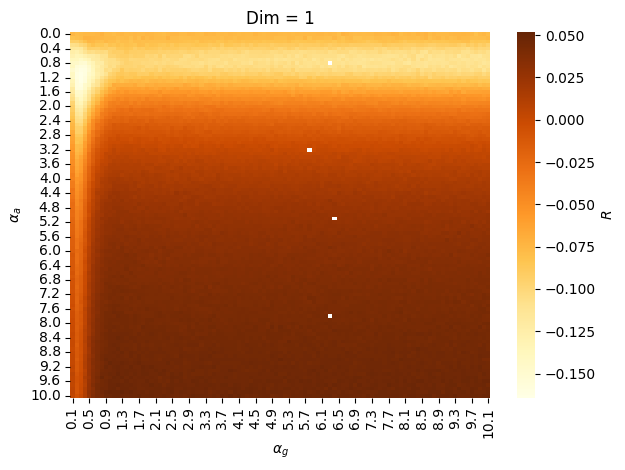

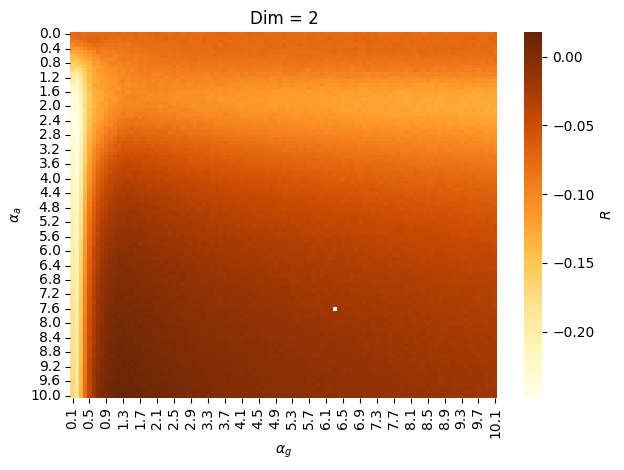

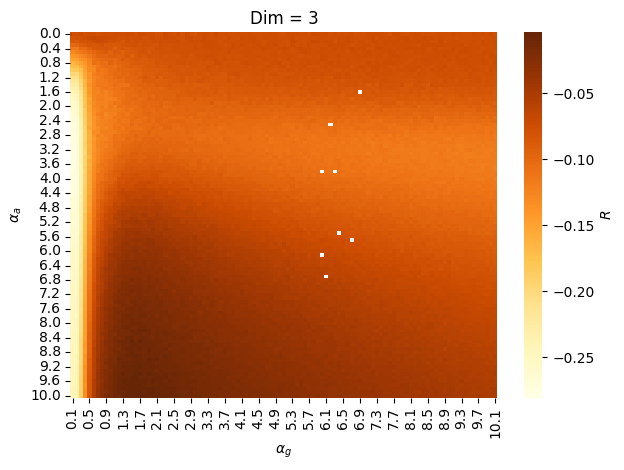

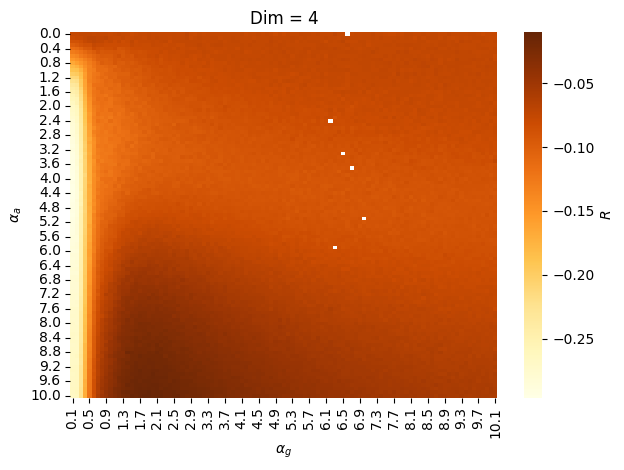

In [44]:
for d in [1,2,3,4]:
    heatmap(df_, propertie = "ass_coeff_mean", label_prop = r'$R$' ,dim = d)
#for d in [1,2,3,4]:
    

In [80]:
def pl(r_max, alpha_g):
    seed = 40
    rng = np.random.default_rng(seed)
    x = []
    if(alpha_g == 0):
        lst = [r_max**rng.uniform(0, 1) for i in range(0,2000)]
    else:
        lst = [r_max/(rng.uniform(0,1)*(1-r_max**alpha_g) + r_max**alpha_g)**(1/alpha_g) for i in range(0,2000)]
    return lst

In [81]:
def plot(r_max, alpha_g):
    plt.hist(pl(r_max, alpha_g), bins = 50, log=True, label=fr'$\alpha_g = ${alpha_g}', alpha = 1.0)
    plt.legend()
    plt.show()

In [83]:
r_max = 10000000
A = pl(r_max,0)
A

[128614.36174155798,
 71433.95528780736,
 3921453.961076366,
 2.615558393650573,
 68178.3984335739,
 2862744.790904985,
 2136.890373677035,
 233.7409672656186,
 16337.27565630541,
 130135.06003425621,
 6.107144013178422,
 5.759674735269824,
 28895.420240675765,
 1.978340536998654,
 2.1577131029270116,
 171.7528207226585,
 30.09113579264123,
 271469.4365257783,
 380793.2769933985,
 15.941098060277069,
 9.549674504884283,
 389.3159296181114,
 5099.076898731119,
 6259.724528302234,
 458.00290623186055,
 1050.990067388118,
 334.6818703821375,
 83.48723347789108,
 22123.281641220856,
 76.75763172304849,
 851.7643293212352,
 3874.390476151072,
 134.13293601408543,
 218.6360733880072,
 49.97804402661505,
 70.60643749813353,
 38.98850600014139,
 111.22365292692467,
 85699.4492289001,
 10.272679879676355,
 21534.361933173175,
 3089.380850513901,
 21.407698741702944,
 196.15409897157218,
 208.12526952183492,
 142.0412292497763,
 6.0914315554295735,
 8618.10755243059,
 19198.18277448674,
 13.8127

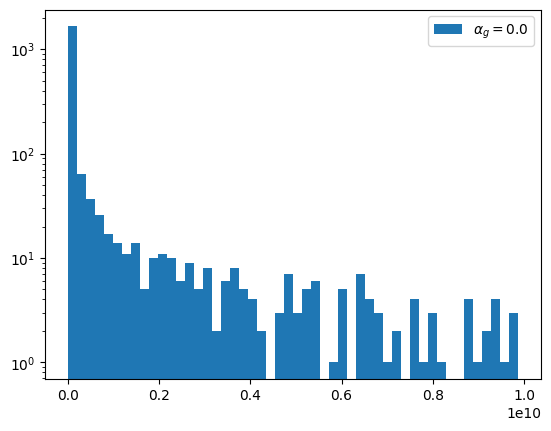

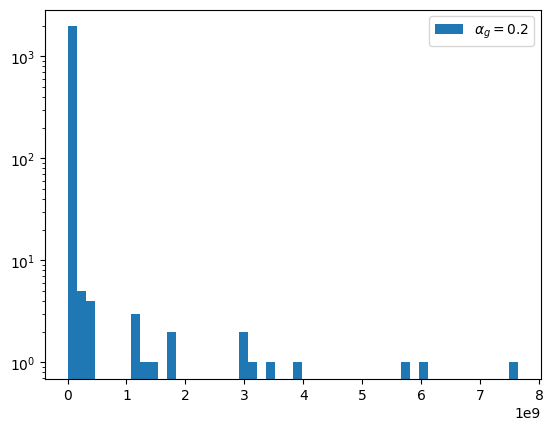

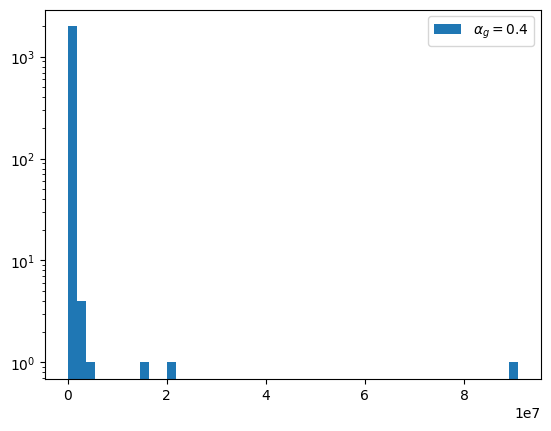

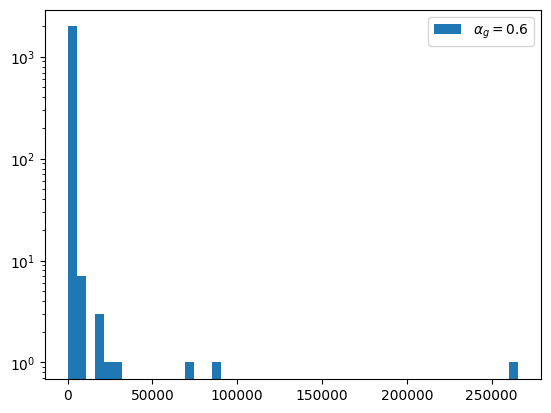

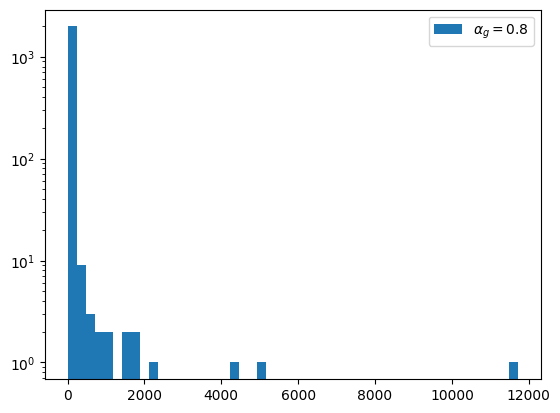

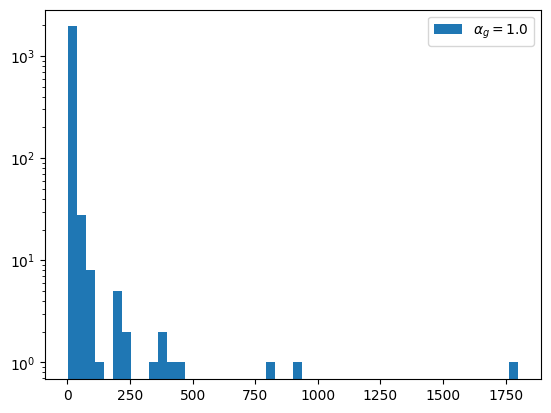

In [82]:
alpha_g = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for g in alpha_g:
    plot(r_max, g)